In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = {
    'InstanceType': ['t2.micro', 't3.medium', 'm5.large', 'c5.large', 'r5.large'],
    'vCPU': [1, 2, 2, 2, 2],
    'Memory': [1, 4, 8, 4, 16],  # in GB
    'PricePerHour': [0.0116, 0.0416, 0.096, 0.085, 0.126]  # in USD
}

In [28]:
df = pd.read_csv('ec2.csv')
df['memory'] = df['memory'].str.replace(' GiB', '').astype(float)
df['monthly_rate'] = df['rate'] * 24 * 30
df.head()

,name,rate,vcpu,memory,storage,network,monthly_rate
0,t4g.nano,0.0053,2,0.5,EBS Only,Up to 5 Gigabit,3.816
1,t4g.micro,0.0106,2,1.0,EBS Only,Up to 5 Gigabit,7.632
2,t4g.small,0.0212,2,2.0,EBS Only,Up to 5 Gigabit,15.264
3,t4g.medium,0.0424,2,4.0,EBS Only,Up to 5 Gigabit,30.528
4,t4g.large,0.0848,2,8.0,EBS Only,Up to 5 Gigabit,61.056


In [29]:
df['price_per_cpu'] = df['rate'] / df['vcpu']
df['memory_per_cpu'] = df['memory'] / df['vcpu']
df.head()

,name,rate,vcpu,memory,storage,network,monthly_rate,price_per_cpu,memory_per_cpu
0,t4g.nano,0.0053,2,0.5,EBS Only,Up to 5 Gigabit,3.816,0.00265,0.25
1,t4g.micro,0.0106,2,1.0,EBS Only,Up to 5 Gigabit,7.632,0.00530,0.50
2,t4g.small,0.0212,2,2.0,EBS Only,Up to 5 Gigabit,15.264,0.01060,1.00
3,t4g.medium,0.0424,2,4.0,EBS Only,Up to 5 Gigabit,30.528,0.02120,2.00
4,t4g.large,0.0848,2,8.0,EBS Only,Up to 5 Gigabit,61.056,0.04240,4.00


In [33]:
def recommend_instance(vcpu_required, memory_required, max_price_per_hour):
    # Filter based on vCPU, Memory, and Price
    filtered_df = df[
        (df['vcpu'] >= vcpu_required) &
        (df['memory'] >= memory_required) &
        (df['rate'] <= max_price_per_hour)
    ]
    
    # If any instances match the criteria, return the best one (cheapest in this case)
    if not filtered_df.empty:
        return filtered_df.sort_values('rate').head(10)
    else:
        return "No instances match the criteria."

In [55]:
recommendation = recommend_instance(2, 16, 100)
print("\nRecommended EC2 instance based on criteria:")
recommendation


Recommended EC2 instance based on criteria:


,name,rate,vcpu,memory,storage,network,monthly_rate,price_per_cpu,memory_per_cpu
428,r6g.large,0.1216,2,16.0,EBS Only,Up to 10 Gigabit,87.552,0.0608,8.0
388,r7g.large,0.1292,2,16.0,EBS Only,Up to 12500 Megabit,93.024,0.0646,8.0
494,r5a.large,0.1360,2,16.0,EBS Only,Up to 10 Gigabit,97.920,0.0680,8.0
416,r6a.large,0.1368,2,16.0,EBS Only,Up to 12500 Megabit,98.496,0.0684,8.0
437,r6gd.large,0.1390,2,16.0,1 x 118 NVMe SSD,Up to 10 Gigabit,100.080,0.0695,8.0
445,r6i.large,0.1520,2,16.0,EBS Only,Up to 12500 Megabit,109.440,0.0760,8.0
485,r5.large,0.1520,2,16.0,EBS Only,Up to 10 Gigabit,109.440,0.0760,8.0
502,r5ad.large,0.1590,2,16.0,1 x 75 NVMe SSD,Up to 10 Gigabit,114.480,0.0795,8.0
405,r7i.large,0.1596,2,16.0,EBS Only,Up to 12500 Megabit,114.912,0.0798,8.0
397,r7gd.large,0.1644,2,16.0,1 x 118 NVMe SSD,Up to 12500 Megabit,118.368,0.0822,8.0


In [21]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

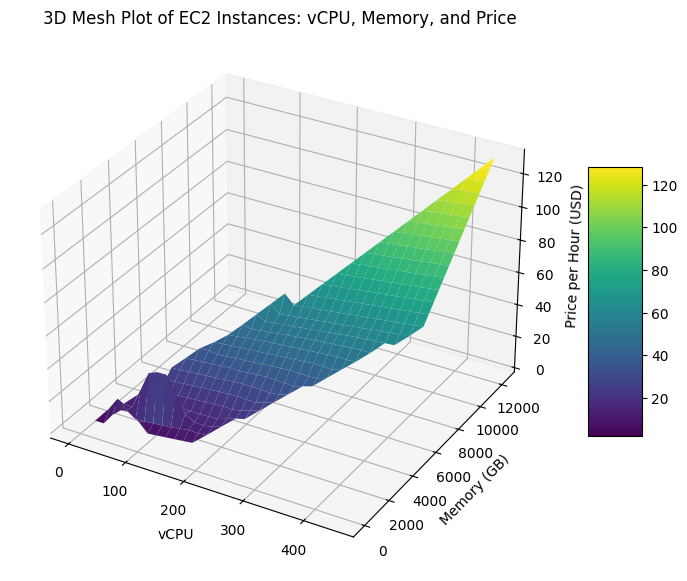

In [57]:
x = df['vcpu']
y = df['memory']
z = df['rate']

# Create a mesh grid for interpolation
x_mesh, y_mesh = np.meshgrid(np.linspace(x.min(), x.max(), 30), np.linspace(y.min(), y.max(), 30))

# Interpolate the Z values (prices) over the mesh grid
z_mesh = griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot a surface using the mesh grid
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis', edgecolor='none')
# Add labels and title
ax.set_xlabel('vCPU')
ax.set_ylabel('Memory (GB)')
ax.set_zlabel('Price per Hour (USD)')
ax.set_title('3D Mesh Plot of EC2 Instances: vCPU, Memory, and Price')

# Add a color bar for the surface
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()

In [58]:
df_plot = df[
        (df['vcpu'] <= 12) &
        (df['memory'] <= 32)]
df_plot

,name,rate,vcpu,memory,storage,network,monthly_rate,price_per_cpu,memory_per_cpu
0,t4g.nano,0.00530,2,0.5,EBS Only,Up to 5 Gigabit,3.8160,0.002650,0.25
1,t4g.micro,0.01060,2,1.0,EBS Only,Up to 5 Gigabit,7.6320,0.005300,0.50
2,t4g.small,0.02120,2,2.0,EBS Only,Up to 5 Gigabit,15.2640,0.010600,1.00
3,t4g.medium,0.04240,2,4.0,EBS Only,Up to 5 Gigabit,30.5280,0.021200,2.00
4,t4g.large,0.08480,2,8.0,EBS Only,Up to 5 Gigabit,61.0560,0.042400,4.00
...,...,...,...,...,...,...,...,...,...
612,im4gn.xlarge,0.43608,4,16.0,1 x 1875 SSD,Up to 25 Gigabit,313.9776,0.109020,4.00
613,im4gn.2xlarge,0.87217,8,32.0,1 x 3750 SSD,Up to 25 Gigabit,627.9624,0.109021,4.00
618,inf2.xlarge,1.06148,4,16.0,EBS Only,Up to 15 Gigabit,764.2656,0.265370,4.00
622,inf1.xlarge,0.30800,4,8.0,EBS Only,Up to 25 Gigabit,221.7600,0.077000,2.00


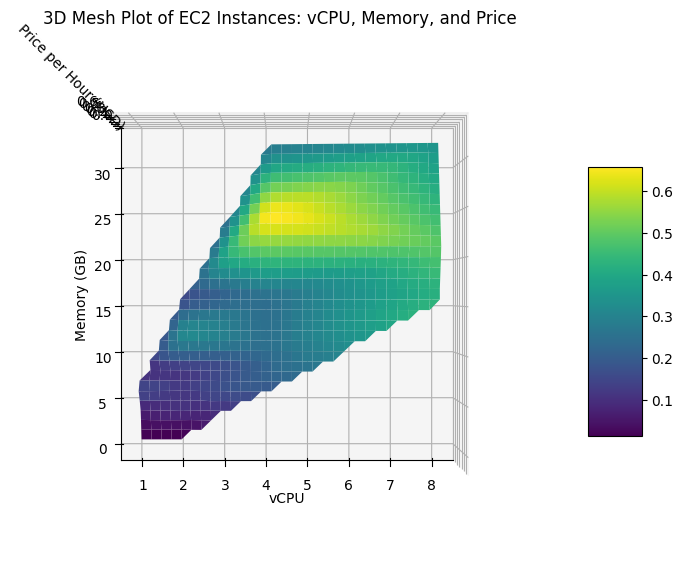

In [59]:
x = df_plot['vcpu']
y = df_plot['memory']
z = df_plot['rate']

# Create a mesh grid for interpolation
x_mesh, y_mesh = np.meshgrid(np.linspace(x.min(), x.max(), 30), np.linspace(y.min(), y.max(), 30))

# Interpolate the Z values (prices) over the mesh grid
z_mesh = griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot a surface using the mesh grid
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis', edgecolor='none')
ax.view_init(elev=90, azim=-90)
# Add labels and title
ax.set_xlabel('vCPU')
ax.set_ylabel('Memory (GB)')
ax.set_zlabel('Price per Hour (USD)')
ax.set_title('3D Mesh Plot of EC2 Instances: vCPU, Memory, and Price')

# Add a color bar for the surface
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()

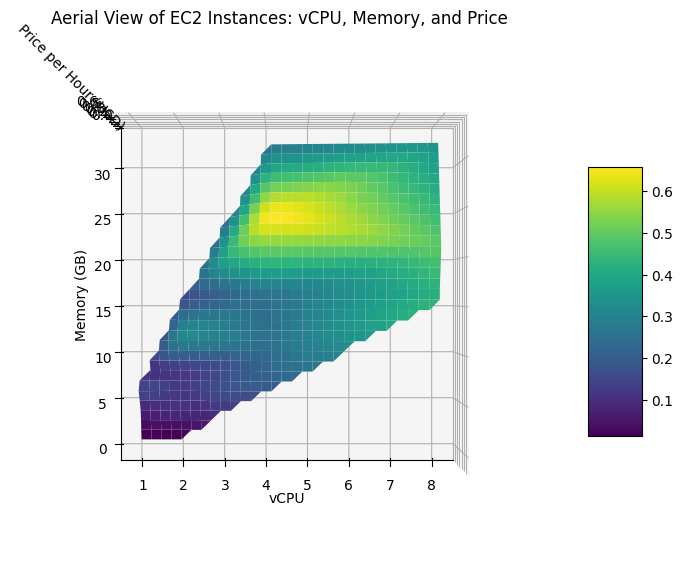

In [51]:
x = df_plot['vcpu']
y = df_plot['memory']
z = df_plot['rate']

# Create a mesh grid for interpolation
x_mesh, y_mesh = np.meshgrid(np.linspace(x.min(), x.max(), 30), np.linspace(y.min(), y.max(), 30))

# Interpolate the Z values (prices) over the mesh grid
z_mesh = griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Plot the aerial view heatmap
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot a surface using the mesh grid
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis', edgecolor='none')

# Adjust the view to be from the top (aerial view)
ax.view_init(elev=90, azim=-90)  # Elevation = 90 for top-down view, adjust azim if needed

# Add labels and title
ax.set_xlabel('vCPU')
ax.set_ylabel('Memory (GB)')
ax.set_zlabel('Price per Hour (USD)')
ax.set_title('Aerial View of EC2 Instances: vCPU, Memory, and Price')

# Add a color bar for the surface
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()